In [1]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np
from scipy.stats import beta, norm

In [5]:
z = 2
Om0 = 0.3
np.random.seed(10)
dL_true = FlatLambdaCDM(H0=70, Om0=Om0).luminosity_distance(z).value
theta = np.random.beta(2,4,10000)
deff_true = (dL_true/theta)


Analysis for the toy problem


$p(H_0|data)\propto \Pi \int \mathcal{L} (data|\log d_{eff})\Pi(\log d_{eff}|H_0,\theta)\Pi(\theta)d\theta d\log d_{eff}$
$\newline$
$p(H_0|data)\propto \Pi \int \exp(-(\log d_{eff}-\log {d_{eff}}^{tr})^2/2\sigma^2) \delta(\log d_{eff}-\log d_L(H_0) + \log{\theta})\Pi(\theta)d\theta d\log d_{eff}$
$\newline$
$p(H_0|data)\propto \Pi \int \exp(-(\log d_{eff}-\log {d_{eff}}^{tr})^2/2\sigma^2) \beta(d_L(H_0)/ \exp(\log(d_{eff})),2,4)  \frac{d_L(H_0)}{\exp(\log(d_{eff}))} d\log d_{eff}$

Perfect Detector


$p(H_0|data)\propto  \beta(d_L(H_0)/ \exp(\log(d^{tr}_{eff})),2,4)  \frac{d_L(H_0)}{\exp(\log(d^{tr}_{eff}))}$

In [6]:
H0 = np.linspace(69,71,100)
pH0 = []
for H0_ in H0:
    dL = FlatLambdaCDM(H0=H0_, Om0=Om0).luminosity_distance(z).value
    t = dL/deff_true
    pH0.append(np.sum(np.log(beta(2,4).pdf(t)*t)))


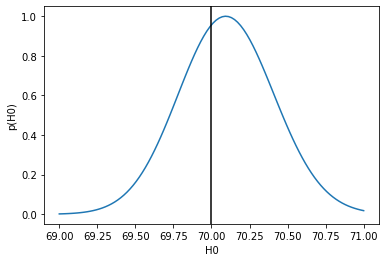

In [7]:
#plot pH0 vs H0
import matplotlib.pyplot as plt
plt.plot(H0, np.exp(pH0-np.max(pH0)))
plt.xlabel('H0')
plt.ylabel('p(H0)')
plt.axvline(70, color='k')
plt.show()


The integral: $\int \exp(-(\log d_{eff}-\log {d_{eff}}^{tr})^2/2\sigma^2) \beta(d_L(H_0)/ \exp(\log(d_{eff})),2,4)  \frac{d_L(H_0)}{\exp(\log(d_{eff}))} d\log d_{eff}$

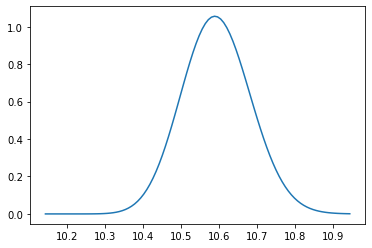

In [6]:
sigma = .1
h=.4
def posterior_one_event(logdeff, h,logdefftrue):
    dL = FlatLambdaCDM(H0=100*h, Om0=Om0).luminosity_distance(z).value
    return norm(logdefftrue,sigma).pdf(logdeff)*beta(2,4).pdf(dL/np.exp(logdeff))*dL/np.exp(logdeff)
log_deff_true = np.log(deff_true[0])
log_deff_array = np.linspace(log_deff_true-4*sigma, log_deff_true+4*sigma, 100)
plt.plot(log_deff_array, posterior_one_event(log_deff_array, h, log_deff_true))

If sigma is very high the integrand shrinks. So trapezoidal does not work. Sampling from broad functions is always hard. Let's look at the priors.


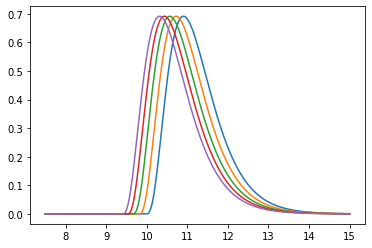

In [12]:
def prior(logdeff, h):
    dL = FlatLambdaCDM(H0=100*h, Om0=Om0).luminosity_distance(z).value
    return beta(2,4).pdf(dL/np.exp(logdeff))*dL/np.exp(logdeff)
logdeff = np.linspace(7.5, +15, 1000000)
plt.plot(logdeff, prior(logdeff, .5))
plt.plot(logdeff, prior(logdeff, .6))
plt.plot(logdeff, prior(logdeff, .7))
plt.plot(logdeff, prior(logdeff, .8))
plt.plot(logdeff, prior(logdeff, .9))


In [46]:
#Calculate the first 10 roots of Hermite polynomials
from scipy.special import roots_hermite
xi,wi = roots_hermite(10, mu=False)

real detector

In [56]:
#sampling
H0 = np.linspace(69,71,10)
pH0_sampling = []
sigma = 0.01
for H0_ in H0:
    dL = FlatLambdaCDM(H0=H0_, Om0=Om0).luminosity_distance(z).value
    t = []
    for deff_true_ in deff_true:
        td_log = np.random.normal(np.log(deff_true_), sigma,1000)
        t1 = np.sum(prior(td_log,H0_/100))
        t.append(t1)
    t = np.array(t)
    pH0_sampling.append(np.sum(np.log(t)))


In [57]:
H0 = np.linspace(69,71,10)
pH0_gauss_Hermite_quadrature = []
sigma = 0.01
sqrt2sigmaxi = np.sqrt(2)*sigma*xi
l = len(sqrt2sigmaxi)
#print (l)
for H0_ in H0:
    log_deff_true = np.log(deff_true)
    points = sqrt2sigmaxi.reshape(l,1) + log_deff_true.reshape(1,10000)
    #print (np.sum(points,axis=1).shape)
    t=np.log(np.sum(wi.reshape(l,1)*np.ones(10000).reshape(1,10000)*prior(points, H0_/100),axis = 0))
    pH0_gauss_Hermite_quadrature.append(np.sum(t))

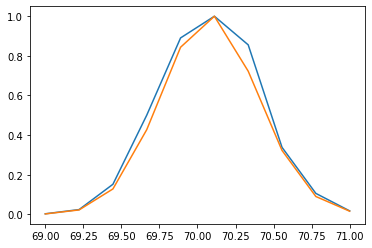

In [58]:
plt.plot(H0, np.exp(pH0_sampling-np.max(pH0_sampling)))
plt.plot(H0, np.exp(pH0_gauss_Hermite_quadrature-np.max(pH0_gauss_Hermite_quadrature)))

In [61]:
H0 = np.linspace(69,71,10)
pH0_sampling = []
sigma = 0.1
for H0_ in H0:
    dL = FlatLambdaCDM(H0=H0_, Om0=Om0).luminosity_distance(z).value
    t = []
    for deff_true_ in deff_true:
        td_log = np.random.normal(np.log(deff_true_), sigma,1000)
        t1 = np.sum(prior(td_log,H0_/100))
        t.append(t1)
    t = np.array(t)
    pH0_sampling.append(np.sum(np.log(t)))

In [59]:
H0 = np.linspace(69,71,10)
pH0_gauss_Hermite_quadrature = []
sigma = 0.1
sqrt2sigmaxi = np.sqrt(2)*sigma*xi
l = len(sqrt2sigmaxi)
#print (l)
for H0_ in H0:
    log_deff_true = np.log(deff_true)
    points = sqrt2sigmaxi.reshape(l,1) + log_deff_true.reshape(1,10000)
    #print (np.sum(points,axis=1).shape)
    t=np.log(np.sum(wi.reshape(l,1)*np.ones(10000).reshape(1,10000)*prior(points, H0_/100),axis = 0))
    pH0_gauss_Hermite_quadrature.append(np.sum(t))

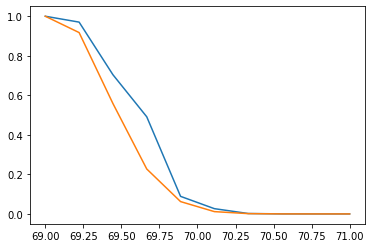

In [62]:
plt.plot(H0, np.exp(pH0_sampling-np.max(pH0_sampling)))
plt.plot(H0, np.exp(pH0_gauss_Hermite_quadrature-np.max(pH0_gauss_Hermite_quadrature)))

Both the integrators gives biased results... Lets increase sigma to 10

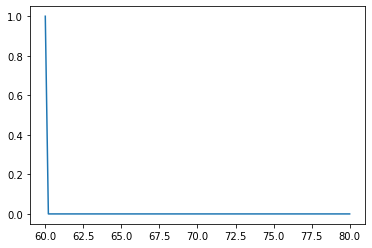

In [65]:
H0 = np.linspace(60,80,100)
pH0_gauss_Hermite_quadrature = []
sigma = 10
sqrt2sigmaxi = np.sqrt(2)*sigma*xi
l = len(sqrt2sigmaxi)
#print (l)
for H0_ in H0:
    log_deff_true = np.log(deff_true)
    points = sqrt2sigmaxi.reshape(l,1) + log_deff_true.reshape(1,10000)
    #print (np.sum(points,axis=1).shape)
    t=np.log(np.sum(wi.reshape(l,1)*np.ones(10000).reshape(1,10000)*prior(points, H0_/100),axis = 0))
    pH0_gauss_Hermite_quadrature.append(np.sum(t))
plt.plot(H0, np.exp(pH0_gauss_Hermite_quadrature-np.max(pH0_gauss_Hermite_quadrature)))

No likelihood
$p(H_0|data)\propto \int  \beta(d_L(H_0)/ \exp(\log(d_{eff})),2,4)  \frac{d_L(H_0)}{\exp(\log(d_{eff}))} d\log d_{eff} $

In [33]:
H0 = np.linspace(50,100,100)
pH0 = []
for H0_ in H0:
    #print (z)
    dL = FlatLambdaCDM(H0=H0_, Om0=Om0).luminosity_distance(z).value
    t = []
    log_deff_true = np.log(deff_true)
    log_deff_true_array = np.linspace(-50, +50, 1000000)
    deff_true_array = np.exp(log_deff_true_array)
    t.append(np.trapz(beta(2,4).pdf(dL/deff_true_array)*dL/deff_true_array, log_deff_true_array))
    print(t)
        
    t = np.array(np.sum(t))
    pH0.append(t)

[0.9999999999999999]
[1.0]
[0.9999999999999994]
[1.0]
[1.0000000000000002]
[0.9999999999999999]
[1.0000000000000002]
[0.9999999999999999]
[0.9999999999999999]
[1.0]
[0.9999999999999999]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0000000000000002]
[1.0]
[1.0000000000000002]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0000000000000002]
[1.0]
[0.9999999999999999]
[1.0]
[1.0]
[1.0000000000000002]
[1.0000000000000002]
[1.0]
[1.0000000000000002]
[1.0000000000000002]
[1.0000000000000002]
[1.0]
[1.0]
[1.0000000000000002]
[0.9999999999999999]
[1.0]
[0.9999999999999999]
[1.0]
[1.0]
[1.0000000000000002]
[1.0]
[1.0000000000000002]
[1.0000000000000002]
[1.0]
[1.0]
[0.9999999999999999]
[0.9999999999999999]
[0.9999999999999999]
[1.0]
[1.0000000000000002]
[1.0000000000000002]
[1.0]
[1.0]
[1.0]
[1.0000000000000004]
[1.0]
[1.0]
[1.0000000000000002]
[1.0]
[1.0000000000000002]
[0.9999999999999999]
[0.9999999999999999]
[1.0]
[1.0]
[1.0]
[1.0000000000000002]
[1.0]
[1.0000000000000002]
[1.0]
[1.0000000000000002]
[1.0

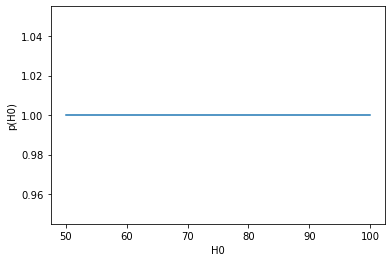

In [34]:
import matplotlib.pyplot as plt
plt.plot(H0, pH0)
plt.xlabel('H0')
plt.ylabel('p(H0)')
plt.show()

Let's check by doing one change...

Let $\Pi(\log d_{eff}|H_0,\theta) = \delta(d_{eff} - d_{eff}(z,H_0,\theta))$

This gives an extra factor of $\frac{1}{d_{eff}}$

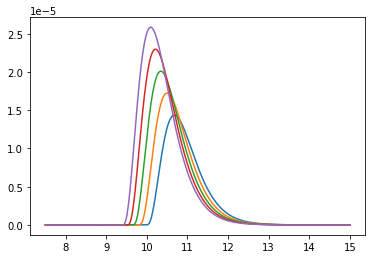

In [66]:
def prior(logdeff, h):
    dL = FlatLambdaCDM(H0=100*h, Om0=Om0).luminosity_distance(z).value
    return beta(2,4).pdf(dL/np.exp(logdeff))*dL/np.exp(logdeff)**2
logdeff = np.linspace(7.5, +15, 1000000)
plt.plot(logdeff, prior(logdeff, .5))
plt.plot(logdeff, prior(logdeff, .6))
plt.plot(logdeff, prior(logdeff, .7))
plt.plot(logdeff, prior(logdeff, .8))
plt.plot(logdeff, prior(logdeff, .9))

In [67]:
#Perfect detector
H0 = np.linspace(69,71,100)
pH0 = []
for H0_ in H0:
    dL = FlatLambdaCDM(H0=H0_, Om0=Om0).luminosity_distance(z).value
    t = dL/deff_true
    pH0.append(np.sum(np.log(beta(2,4).pdf(t)*t/deff_true)))


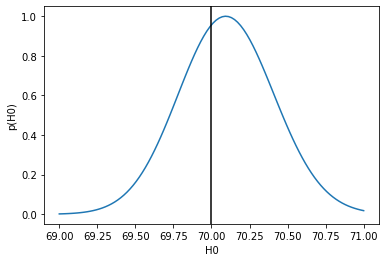

In [68]:
#plot pH0 vs H0
import matplotlib.pyplot as plt
plt.plot(H0, np.exp(pH0-np.max(pH0)))
plt.xlabel('H0')
plt.ylabel('p(H0)')
plt.axvline(70, color='k')
plt.show()

Real Detector

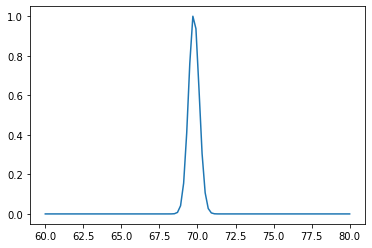

In [69]:
H0 = np.linspace(60,80,100)
pH0_gauss_Hermite_quadrature = []
sigma = .1
sqrt2sigmaxi = np.sqrt(2)*sigma*xi
l = len(sqrt2sigmaxi)
#print (l)
for H0_ in H0:
    log_deff_true = np.log(deff_true)
    points = sqrt2sigmaxi.reshape(l,1) + log_deff_true.reshape(1,10000)
    #print (np.sum(points,axis=1).shape)
    t=np.log(np.sum(wi.reshape(l,1)*np.ones(10000).reshape(1,10000)*prior(points, H0_/100),axis = 0))
    pH0_gauss_Hermite_quadrature.append(np.sum(t))
plt.plot(H0, np.exp(pH0_gauss_Hermite_quadrature-np.max(pH0_gauss_Hermite_quadrature)))

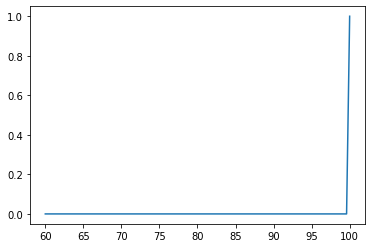

In [71]:
H0 = np.linspace(60,100,100)
pH0_gauss_Hermite_quadrature = []
sigma = 1
sqrt2sigmaxi = np.sqrt(2)*sigma*xi
l = len(sqrt2sigmaxi)
#print (l)
for H0_ in H0:
    log_deff_true = np.log(deff_true)
    points = sqrt2sigmaxi.reshape(l,1) + log_deff_true.reshape(1,10000)
    #print (np.sum(points,axis=1).shape)
    t=np.log(np.sum(wi.reshape(l,1)*np.ones(10000).reshape(1,10000)*prior(points, H0_/100),axis = 0))
    pH0_gauss_Hermite_quadrature.append(np.sum(t))
plt.plot(H0, np.exp(pH0_gauss_Hermite_quadrature-np.max(pH0_gauss_Hermite_quadrature)))